In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time

In [4]:
df = pd.read_csv("Hotel Reservations.csv")

## Primary EDA 

Includes assessment of variable types, descriptive statistics, correlations, count plots of categorical predictors vs. response, box plots of continuous predictors vs. response. 

In [5]:
# Snapshot of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Distributions of continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
# Calculating number of missing variables
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

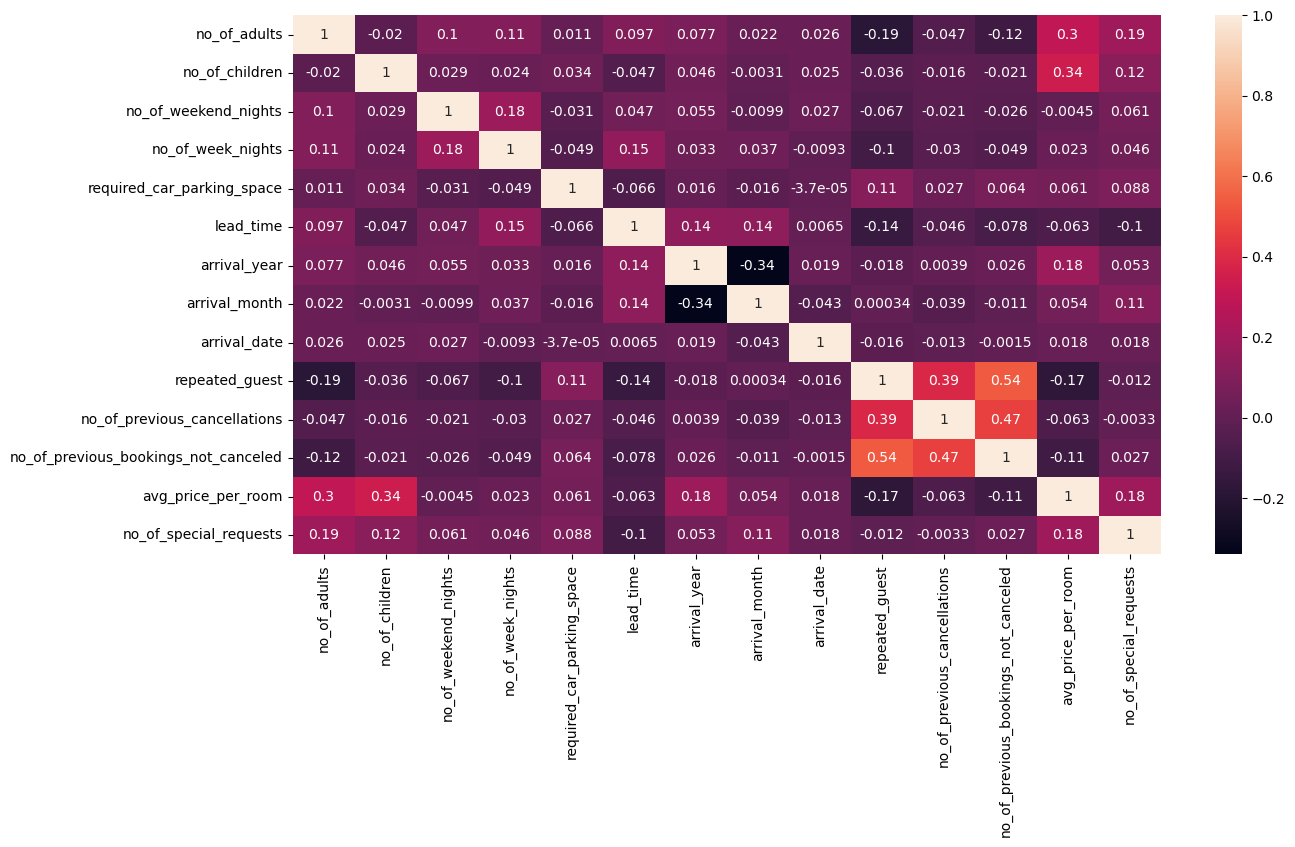

In [9]:
# Determining correlations between continuous predictors
plt.figure(figsize = (14,7));
sns.heatmap(df.corr(), annot = True);

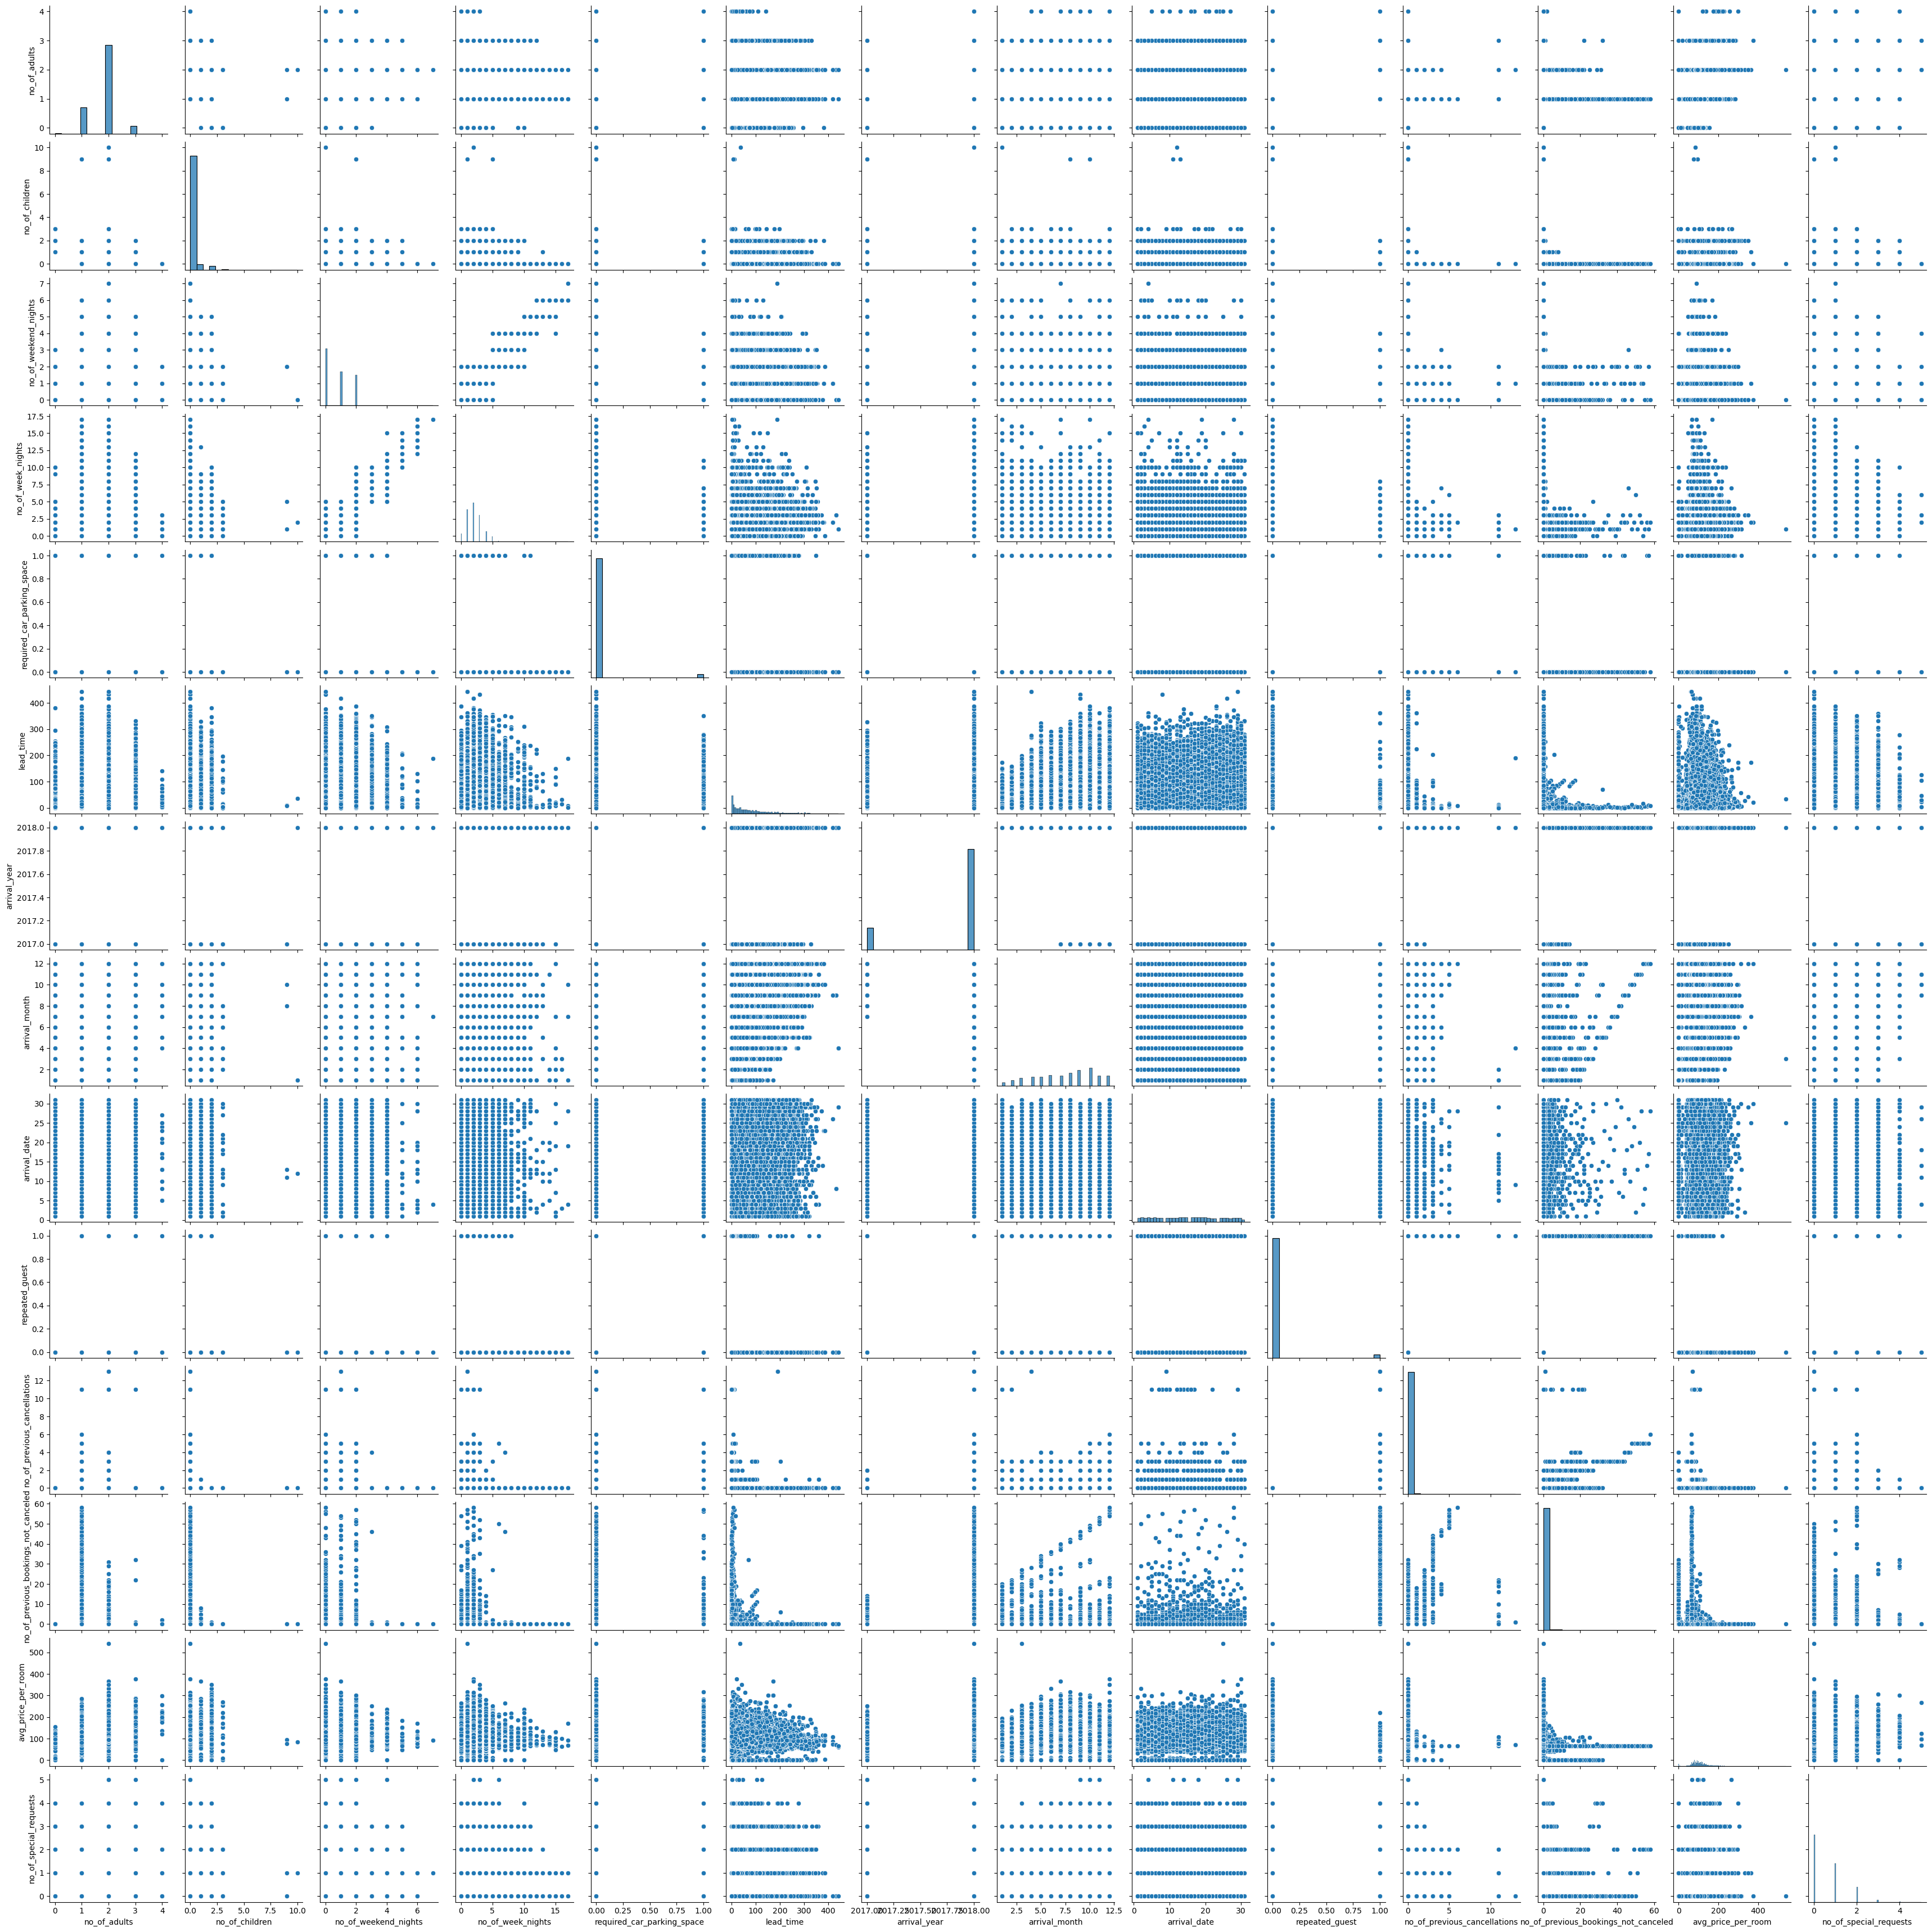

In [10]:
# Visualize distributions and relationships 
sns.pairplot(df)

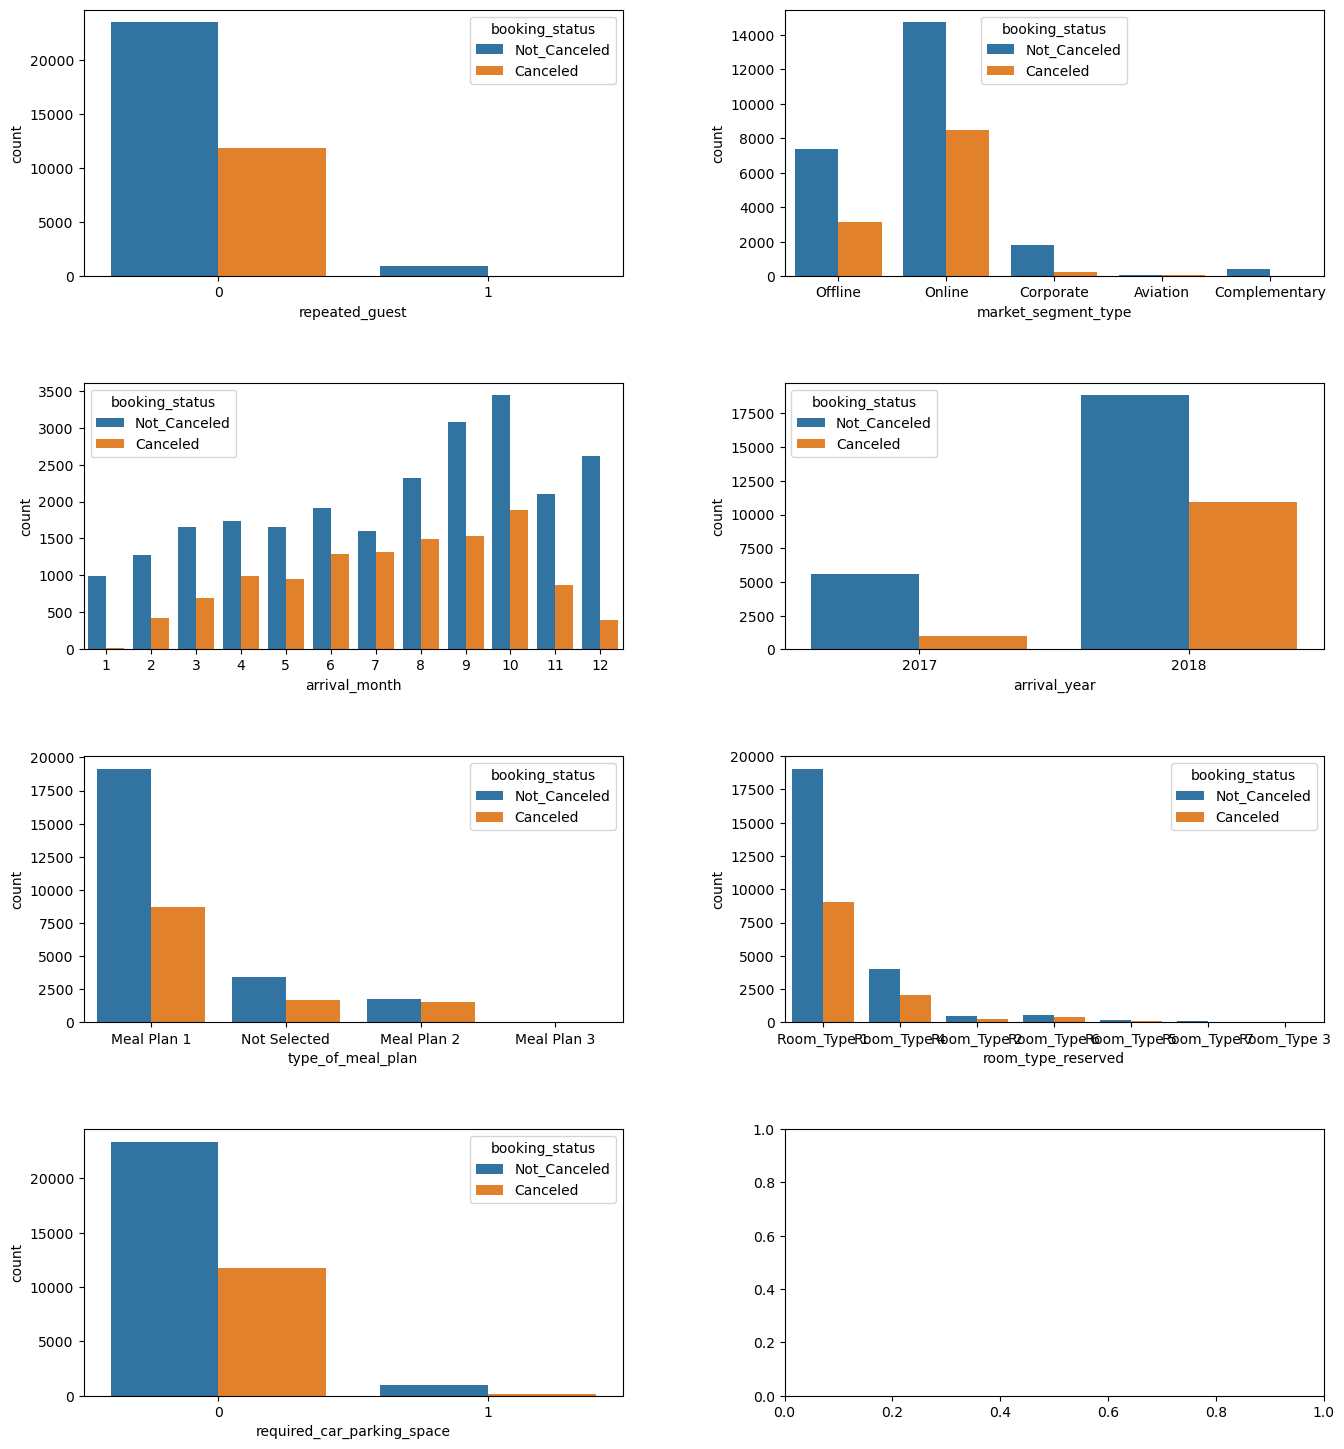

In [11]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 2, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=df, x ='repeated_guest', hue="booking_status", ax=ax[0, 0]);
sns.countplot(data=df,x='market_segment_type',hue='booking_status', ax=ax[0, 1]);
sns.countplot(data=df, x="arrival_month", hue="booking_status", ax=ax[1,0]);
sns.countplot(data=df, x="arrival_year",   hue="booking_status", ax=ax[1,1]);
sns.countplot(data=df, x="type_of_meal_plan",   hue="booking_status", ax=ax[2,0]);
sns.countplot(data=df, x="room_type_reserved",   hue="booking_status", ax=ax[2,1]);
sns.countplot(data=df, x="required_car_parking_space",   hue="booking_status", ax=ax[3,0]);


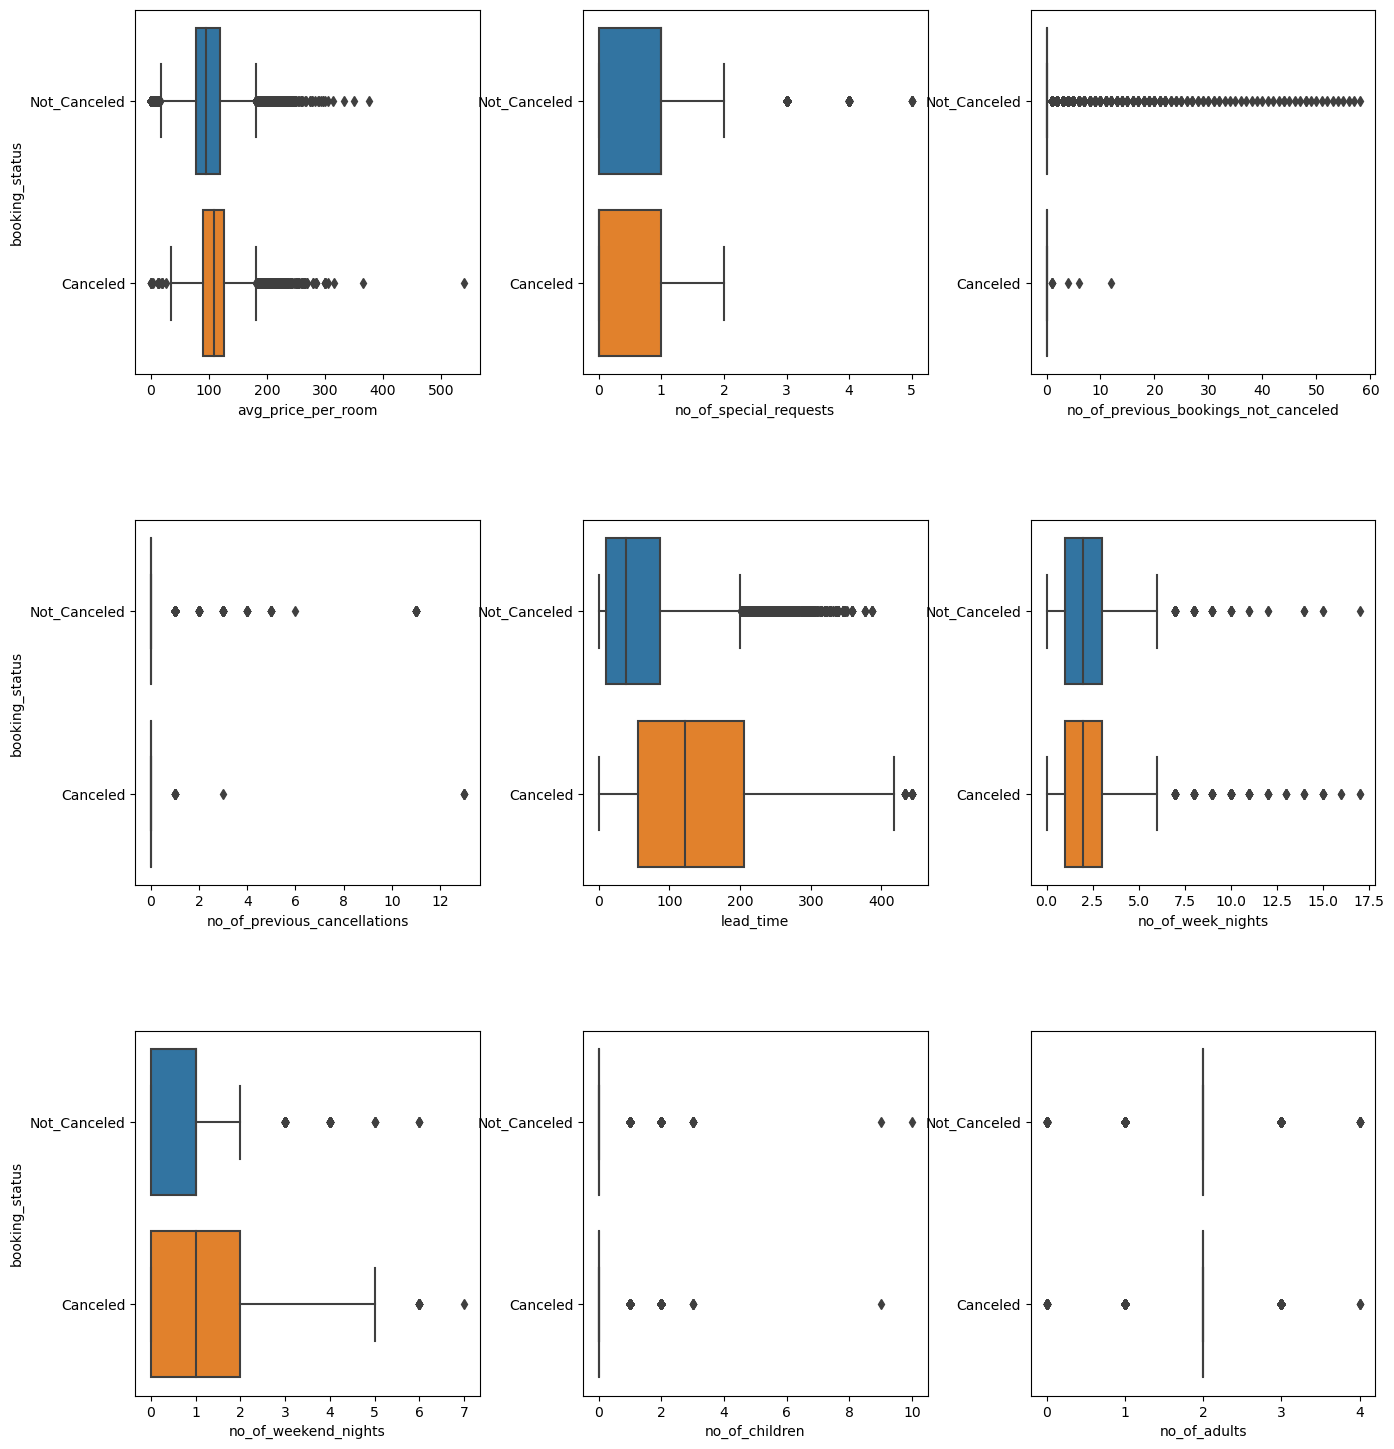

In [12]:
# Relationship between continuous variables and response
fig, ax = plt.subplots(3, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.boxplot(data=df, x ='avg_price_per_room', y ='booking_status', ax=ax[0, 0]);
sns.boxplot(data=df, x ='no_of_special_requests', y ='booking_status', ax=ax[0, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_bookings_not_canceled', y ='booking_status', ax=ax[0, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_cancellations', y ='booking_status', ax=ax[1, 0]);
sns.boxplot(data=df, x ='lead_time', y ='booking_status', ax=ax[1, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_week_nights', y ='booking_status', ax=ax[1, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_weekend_nights', y ='booking_status', ax=ax[2, 0]);
sns.boxplot(data=df, x ='no_of_children', y ='booking_status', ax=ax[2, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_adults', y ='booking_status', ax=ax[2, 2]).set(ylabel=None);

In [13]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
df['booking_status'].replace(['Canceled', 'Not_Canceled'],[1, 0], inplace=True)

In [14]:
# Proportion of 0 and 1s in response
df.booking_status.value_counts(1)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

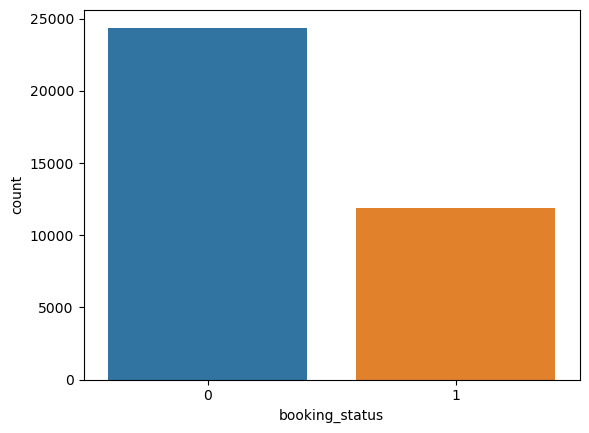

In [15]:
# Visualizing proportion of 0s and 1s in response
sns.countplot(x = 'booking_status', data = df)

In [16]:
# Correlation of continuous variables with response
df.corrwith(df.booking_status)

no_of_adults                            0.086920
no_of_children                          0.033078
no_of_weekend_nights                    0.061563
no_of_week_nights                       0.092996
required_car_parking_space             -0.086185
lead_time                               0.438538
arrival_year                            0.179529
arrival_month                          -0.011233
arrival_date                            0.010629
repeated_guest                         -0.107287
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
avg_price_per_room                      0.142569
no_of_special_requests                 -0.253070
booking_status                          1.000000
dtype: float64

In [17]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(df.market_segment_type)
dummy_month = pd.get_dummies(df.arrival_month)
dummy_meal = pd.get_dummies(df.type_of_meal_plan)
dummy_room = pd.get_dummies(df.room_type_reserved)

# add dummy variables to df and drop 1 to avoid perfect multicollinearity in model 
df_dummy = pd.concat([df, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
df_dummy.columns = df_dummy.columns.astype(str)
df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [18]:
# Remove spaces from column names 
df_dummy.columns = df_dummy.columns.str.replace(' ', '')

# Convert month number to name in columns 
df_dummy.rename(columns={'1': 'January', '2': 'February', '3': 'March', 
                         '5': 'May', '6': 'June', '7': 'July', 
                        '8': 'August', '9': 'September', '10': 'October',
                        '11': 'November', '12': 'December'}, inplace=True)

df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [19]:
# Split train and test datasets
train, test = train_test_split(df_dummy, test_size=0.25, random_state=25, shuffle=True)
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
6093,INN06094,2,0,2,3,Meal Plan 1,0,Room_Type 4,85,2018,...,0,1,0,0,0,0,0,1,0,0
11877,INN11878,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,...,0,1,0,0,1,0,0,0,0,0
27585,INN27586,2,0,2,2,Meal Plan 1,0,Room_Type 2,159,2018,...,0,1,0,0,0,1,0,0,0,0
28306,INN28307,2,0,1,0,Meal Plan 1,0,Room_Type 1,258,2018,...,0,1,0,0,1,0,0,0,0,0
19753,INN19754,2,0,0,3,Meal Plan 1,0,Room_Type 1,116,2018,...,0,1,0,0,1,0,0,0,0,0


Text(0.5, 0, 'Lead Time Binned')

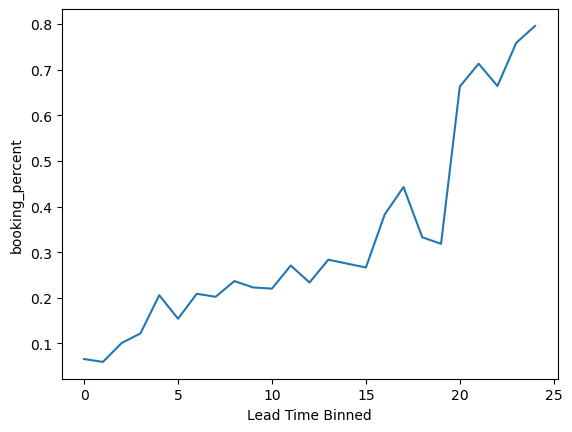

In [20]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_lead = pd.qcut(train['lead_time'],25,retbins=True)
train['lead_binned'] = binned_lead[0]

lead_data = train.groupby('lead_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = lead_data.index, y= lead_data['booking_percent'])
plt.xlabel('Lead Time Binned')

In [21]:
lead_data

,lead_binned,booking_percent,nobs
0,"(-0.001, 1.0]",0.065775,1794
1,"(1.0, 2.0]",0.059426,488
2,"(2.0, 5.0]",0.100890,1348
3,"(5.0, 8.0]",0.121881,1042
4,"(8.0, 11.0]",0.205692,773
5,"(11.0, 16.0]",0.154091,1259
6,"(16.0, 21.0]",0.208855,1039
7,"(21.0, 27.0]",0.202180,1009
8,"(27.0, 33.0]",0.236588,1137
9,"(33.0, 39.0]",0.222693,1181


We see that the relationship between lead time and percentage of people canceling a booking displays a very close linear relationship. So people who make their booking between 6 months and 1 year in advance have a higher likelihood of canceling. 

Text(0.5, 0, 'Average Price Per Room Binned')

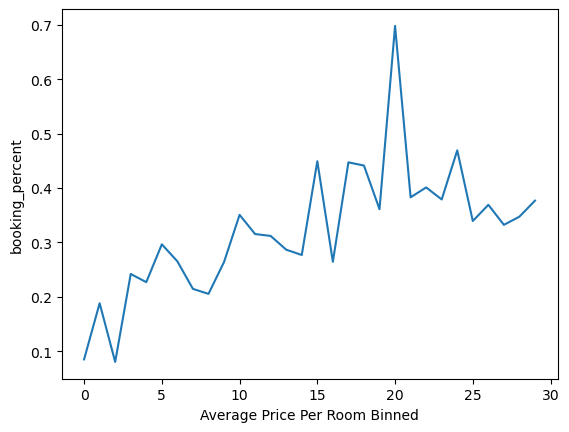

In [22]:
# Line plots of relationship between response and highly correlated continuous predictors 
binned_price = pd.qcut(train['avg_price_per_room'],30,retbins=True)
train['price_binned'] = binned_price[0]

price_data = train.groupby('price_binned')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = price_data.index, y= price_data['booking_percent'])
plt.xlabel('Average Price Per Room Binned')

Rooms that have a higher average price of about 100 - 500 dollars are more likely to be canceled. The booking_percent seems to plateau, so this predictor may need to be transformed. 

In [23]:
price_data

,price_binned,booking_percent,nobs
0,"(-0.001, 55.737]",0.084895,907
1,"(55.737, 65.0]",0.188132,1483
2,"(65.0, 67.0]",0.080214,374
3,"(67.0, 71.203]",0.241898,864
4,"(71.203, 74.89]",0.226872,908
5,"(74.89, 76.5]",0.296443,1012
6,"(76.5, 79.2]",0.265105,811
7,"(79.2, 81.0]",0.214502,993
8,"(81.0, 85.0]",0.205319,940
9,"(85.0, 87.917]",0.263835,777


Text(0.5, 0, 'Number of Special Requests Binned')

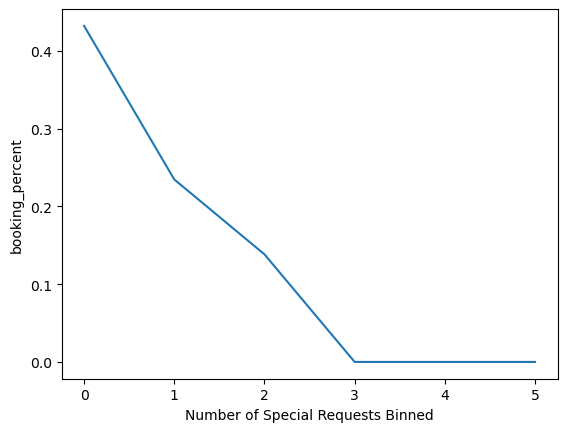

In [24]:
# Line plots of relationship between response and highly correlated continuous predictors 
special_data = train.groupby('no_of_special_requests')['booking_status'].agg([('booking_percent','mean'),('nobs','count')]).reset_index(drop=False)
sns.lineplot(x = special_data.index, y= special_data['booking_percent'])
plt.xlabel('Number of Special Requests Binned')

A higher number of special requests greatly decreases the likelihood that the booking will be canceled. 

In [25]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6', 'lead_binned', 'price_binned'],
      dtype='object')

In [26]:
# Assess collinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = train[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
     'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                                 feature           VIF
0                                  const  3.540336e+07
1                           no_of_adults  1.204920e+00
2                         no_of_children  1.159884e+00
3                   no_of_weekend_nights  1.055271e+00
4                      no_of_week_nights  1.073511e+00
5             required_car_parking_space  1.029785e+00
6                              lead_time  1.162852e+00
7                           arrival_year  1.269626e+00
8                          arrival_month  1.241907e+00
9                           arrival_date  1.004925e+00
10                        repeated_guest  1.565824e+00
11          no_of_previous_cancellations  1.332097e+00
12  no_of_previous_bookings_not_canceled  1.597556e+00
13                    avg_price_per_room  1.376660e+00
14                no_of_special_requests  1.115423e+00


## Baseline Model 
Evaluating model with all predictor variables. Categorical predictors have been transformed to dummy variables. 

In [27]:
# Baseline model with all predictors (continuous and categorical) and no interactions 
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests+\
       Complementary+Corporate+Offline+Online+January+February+March+May+June+\
       July+August+September+October+November+December+MealPlan1+MealPlan2+\
       NotSelected+Room_Type1+Room_Type2+Room_Type3+\
       Room_Type4+Room_Type5+Room_Type6', data = train).fit()
baseline_model.summary()

         Current function value: 0.406889
         Iterations: 35


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27168
Method:                           MLE   Df Model:                           37
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3553
Time:                        12:52:56   Log-Likelihood:                -11070.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -953.3177   3.45e+04     -0.028      0.978   -6.86e+04    6.67e+04
no_of_adults                             0.1417      0.038      3.735      0.000       0.067       0.216
no_of_children                           0.2050      0.059      3.451      0.001       0.089       0.321
no_of_weekend_nights                     0.1310      0.020      6.638      0.000       0.092       0.170
no_of_week_nights                        0.0563      0.012      4.563      0.000       0.032       0.080
required_car_parking_space              -1.7396      0.142    -12.226      0.000      -2.019      -1.461
lead_time                                0.0162      0.000     57.587      0.000       0.016       0.017
arrival_year                             0.4718      0.062      7.561      0.000       0.350       0.594
arrival_date                             0.0026      0.002      1.354      0.176      -0.001       0.006
repeated_guest                          -2.0207      0.483     -4.181      0.000      -2.968      -1.074
no_of_previous_cancellations             0.3279      0.095      3.465      0.001       0.142       0.513
no_of_previous_bookings_not_canceled    -0.0903      0.077     -1.173      0.241      -0.241       0.061
avg_price_per_room                       0.0194      0.001     23.911      0.000       0.018       0.021
no_of_special_requests                  -1.5720      0.030    -51.984      0.000      -1.631      -1.513
Complementary                          -20.6477   3752.701     -0.006      0.996   -7375.807    7334.512
Corporate                               -0.8690      0.253     -3.437      0.001      -1.365      -0.373
Offline                                 -1.9568      0.242     -8.088      0.000      -2.431      -1.483
Online                                  -0.1045      0.239     -0.438      0.662      -0.572       0.363
January                                 -2.2706      0.251     -9.051      0.000      -2.762      -1.779
February                                 0.5317      0.093      5.726      0.000       0.350       0.714
March                                    0.2699      0.082      3.303      0.001       0.110       0.430
May                                     -0.3591      0.081     -4.449      0.000      -0.517      -0.201
June                                    -0.1412      0.077     -1.843      0.065      -0.291       0.009
July                                    -0.2188      0.079     -2.779      0.005      -0.373      -0.065
August                                  -0.1996      0.077     -2.576      0.010      -0.351      -0.048
September                               -0.3166      0.079     -4.013      0.000      -0.471      -0.162
October                                  0.0305      0.075      0.407      0.684      -0.116       0.177
November                                 0.3207      0.083      3.843      0.000       0.15

In [28]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 80.3%
Precision = 68.5%
TPR or Recall = 73.2%
FNR = 26.8%
FPR = 16.3%
ROC-AUC = 87.5%


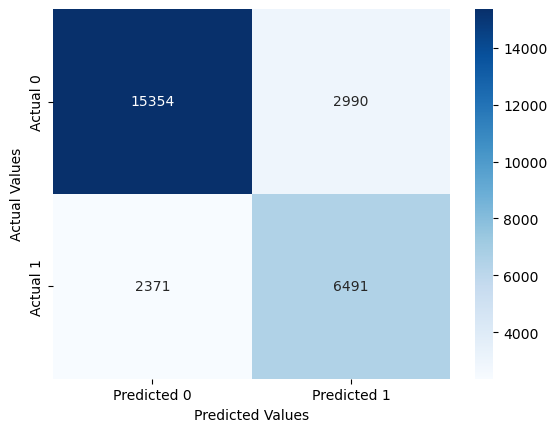

In [29]:
# Evaluating baseline model on train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = 0.4)

Classification accuracy = 79.4%
Precision = 68.5%
TPR or Recall = 70.5%
FNR = 29.5%
FPR = 16.2%
ROC-AUC = 86.4%


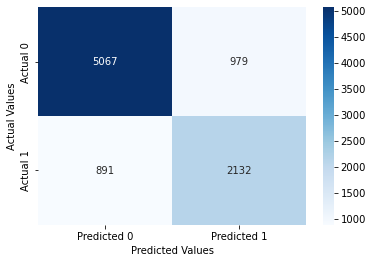

In [17]:
# Evaluating baseline model on test data
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = 0.4)

In [18]:
# Baseline model with only continuous and binary categorical variables 
baseline_cont_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_cont_model.summary()

Optimization terminated successfully.
         Current function value: 0.454970
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2791
Time:                        10:31:45   Log-Likelihood:                -12378.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1960.2624    100.223    -19.559      0.000   -2156.695   -1763.829
no_of_adults                             0.1899      0.033      5.754      0.000       0.125       0.255
no_of_children                           0.0154      0.042      0.363      0.717      -0.068       0.098
no_of_weekend_nights                     0.1669      0.018      9.175      0.000       0.131       0.203
no_of_week_nights                        0.0526      0.011      4.675      0.000       0.031       0.075
required_car_parking_space              -1.3970      0.136    -10.237      0.000      -1.665      -1.130
lead_time                                0.0122      0.000     58.370      0.000       0.012       0.013
arrival_year                             0.9696      0.050     19.520      0.000       0.872       1.067
arrival_date                             0.0015      0.002      0.827      0.408      -0.002       0.005
repeated_guest                          -2.1063      0.430     -4.902      0.000      -2.948      -1.264
no_of_previous_cancellations             0.2415      0.076      3.197      0.001       0.093       0.390
no_of_previous_bookings_not_canceled    -0.0954      0.085     -1.128      0.259      -0.261       0.070
avg_price_per_room                       0.0180      0.001     31.509      0.000       0.017       0.019
no_of_special_requests                  -1.1698      0.026    -44.880      0.000      -1.221      -1.119
========================================================================================================
"""

Classification accuracy = 77.6%
Precision = 65.6%
TPR or Recall = 66.1%
FNR = 33.9%
FPR = 16.8%
ROC-AUC = 83.8%


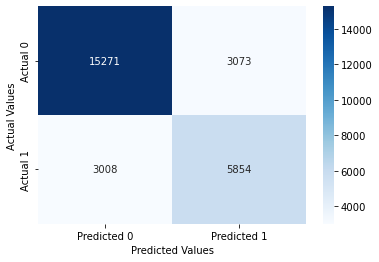

In [19]:
# Evaluating baseline continous model on train data
confusion_matrix_data(train, train.booking_status, baseline_cont_model, cutoff = 0.4)

Classification accuracy = 76.7%
Precision = 65.8%
TPR or Recall = 62.8%
FNR = 37.2%
FPR = 16.3%
ROC-AUC = 82.8%


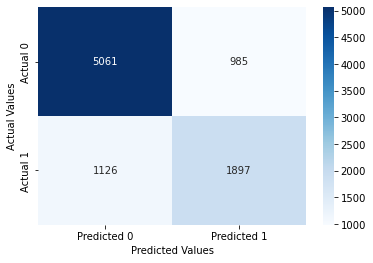

In [34]:
# Evaluating baseline continous model on test data
confusion_matrix_data(test, test.booking_status, baseline_cont_model, cutoff = 0.4)

## EDA-Based Models
Models with variable transformations and interactions based on EDA. 

In [21]:
# Initial Logit model 
logit_model_1 = sm.logit('booking_status~np.log(lead_time+1)+np.log(avg_price_per_room+1)+no_of_special_requests',
                        data = train).fit()
logit_model_1.summary()

Optimization terminated successfully.
         Current function value: 0.478240
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27202
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2422
Time:                        10:31:52   Log-Likelihood:                -13011.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -13.4977      0.288    -46.883      0.000     -14.062     -12.933
np.log(lead_time + 1)              0.8436      0.015     57.079      0.000       0.815       0.873
np.log(avg_price_per_room + 1)     2.1477      0.058     37.061      0.000       2.034       2.261
no_of_special_requests            -1.0933      0.024    -45.054      0.000      -1.141      -1.046
==================================================================================================
"""

Classification accuracy = 75.6%
Precision = 60.9%
TPR or Recall = 70.5%
FNR = 29.5%
FPR = 21.9%
ROC-AUC = 82.2%


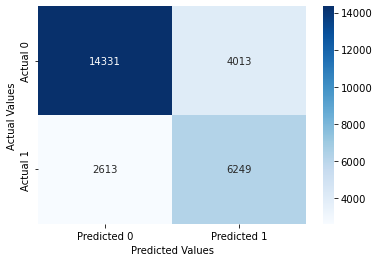

In [22]:
confusion_matrix_data(train, train.booking_status, logit_model_1, cutoff = 0.4)

Classification accuracy = 74.9%
Precision = 60.9%
TPR or Recall = 68.7%
FNR = 31.3%
FPR = 22.0%
ROC-AUC = 81.1%


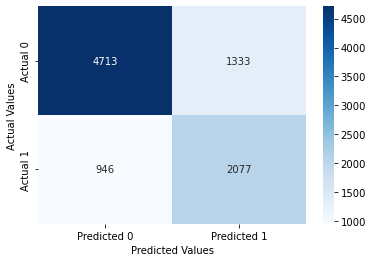

In [23]:
confusion_matrix_data(test, test.booking_status, logit_model_1, cutoff = 0.4)

In [24]:
# Logistic regression model with only continuous variables
logit_model_2 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
np.log(avg_price_per_room+1)+np.log(avg_price_per_room+1)*no_of_adults+np.log(avg_price_per_room+1)*no_of_children', data = train).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.473369
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2500
Time:                        10:32:09   Log-Likelihood:                -12878.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           -15.7306      1.040    -15.131      0.000     -17.768     -13.693
no_of_special_requests                                               -1.1354      0.025    -45.284      0.000      -1.185      -1.086
np.log(lead_time + 1)                                                 0.8423      0.015     55.044      0.000       0.812       0.872
no_of_weekend_nights                                                 -0.0626      0.029     -2.136      0.033      -0.120      -0.005
no_of_week_nights                                                    -0.0940      0.018     -5.241      0.000      -0.129      -0.059
no_of_weekend_nights:no_of_week_nights                                0.0733      0.008      9.010      0.000       0.057       0.089
no_of_previous_cancellations                                          0.0735      0.080      0.916      0.360      -0.084       0.231
no_of_previous_bookings_not_canceled                                 -0.4605      0.150     -3.079      0.002      -0.754      -0.167
no_of_previous_cancellations:no_of_previous_bookings_not_canceled     0.0368      0.019      1.962      0.050    4.17e-05       0.074
np.log(avg_price_per_room + 1)                                        2.5905      0.222     11.694      0.000       2.156       3.025
no_of_adults                                                          1.3215      0.510      2.589      0.010       0.321       2.322
np.log(avg_price_per_room + 1):no_of_adults                          -0.2485      0.108     -2.300      0.021      -0.460      -0.037
no_of_children                                                        1.5019      0.524      2.866      0.004       0.475       2.529
np.log(avg_price_per_room + 1):no_of_children                        -0.2840      0.105     -2.699      0.007      -0.490      -0.078
=====================================================================================================================================
"""

Classification accuracy = 75.8%
Precision = 61.0%
TPR or Recall = 71.1%
FNR = 28.9%
FPR = 22.0%
ROC-AUC = 82.7%


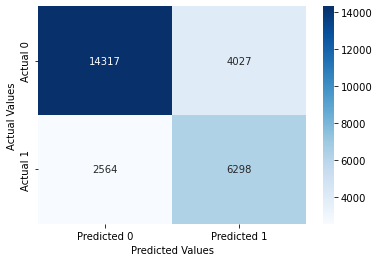

In [25]:
confusion_matrix_data(train, train.booking_status, logit_model_2, cutoff = 0.4)

Classification accuracy = 74.7%
Precision = 60.6%
TPR or Recall = 69.2%
FNR = 30.8%
FPR = 22.5%
ROC-AUC = 81.5%


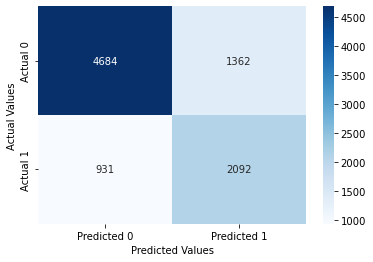

In [26]:
confusion_matrix_data(test, test.booking_status, logit_model_2, cutoff = 0.4)

In [27]:
# Logistic regression model adding categorical variables
logit_model_3 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+no_of_weekend_nights+\
np.log(avg_price_per_room+1)+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children+\
repeated_guest', data = train).fit()
logit_model_3.summary()

Optimization terminated successfully.
         Current function value: 0.474553
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27195
Method:                           MLE   Df Model:                           10
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2481
Time:                        10:32:17   Log-Likelihood:                -12911.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -10.0624      0.855    -11.775      0.000     -11.737      -8.387
no_of_special_requests               -1.1408      0.025    -45.637      0.000      -1.190      -1.092
np.log(lead_time + 1)                 0.8350      0.015     54.729      0.000       0.805       0.865
no_of_weekend_nights                  0.1620      0.017      9.285      0.000       0.128       0.196
np.log(avg_price_per_room + 1)        0.8309      0.241      3.446      0.001       0.358       1.304
avg_price_per_room                    0.0222      0.003      6.527      0.000       0.016       0.029
no_of_adults                          0.6579      0.114      5.764      0.000       0.434       0.882
avg_price_per_room:no_of_adults      -0.0049      0.001     -5.108      0.000      -0.007      -0.003
no_of_children                        0.5590      0.124      4.506      0.000       0.316       0.802
avg_price_per_room:no_of_children    -0.0036      0.001     -4.454      0.000      -0.005      -0.002
repeated_guest                       -1.3909      0.285     -4.877      0.000      -1.950      -0.832
=====================================================================================================
"""

Classification accuracy = 75.9%
Precision = 61.2%
TPR or Recall = 70.7%
FNR = 29.3%
FPR = 21.7%
ROC-AUC = 82.5%


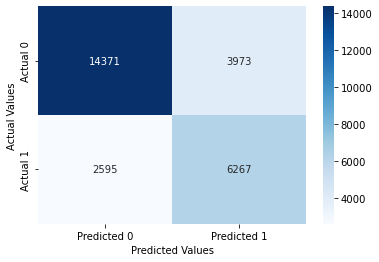

In [28]:
confusion_matrix_data(train, train.booking_status, logit_model_3, cutoff = 0.4)

Classification accuracy = 75.0%
Precision = 61.1%
TPR or Recall = 68.9%
FNR = 31.1%
FPR = 21.9%
ROC-AUC = 81.4%


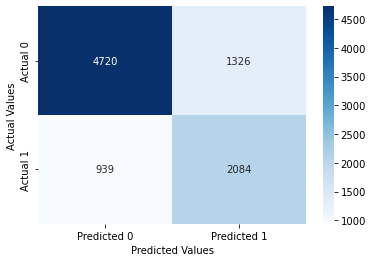

In [29]:
confusion_matrix_data(test, test.booking_status, logit_model_3, cutoff = 0.4)

In [30]:
logit_model_4 = sm.logit('booking_status~no_of_special_requests+np.log(lead_time+1)+\
np.log(avg_price_per_room+1)+repeated_guest', data = train).fit()
logit_model_4.summary()

Optimization terminated successfully.
         Current function value: 0.477393
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27201
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2436
Time:                        10:32:33   Log-Likelihood:                -12988.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -13.2805      0.289    -45.880      0.000     -13.848     -12.713
no_of_special_requests            -1.0946      0.024    -45.130      0.000      -1.142      -1.047
np.log(lead_time + 1)              0.8323      0.015     56.000      0.000       0.803       0.861
np.log(avg_price_per_room + 1)     2.1133      0.058     36.362      0.000       1.999       2.227
repeated_guest                    -1.5566      0.284     -5.477      0.000      -2.114      -1.000
==================================================================================================
"""

Classification accuracy = 75.3%
Precision = 60.4%
TPR or Recall = 70.7%
FNR = 29.3%
FPR = 22.4%
ROC-AUC = 82.3%


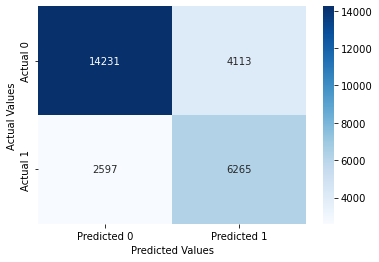

In [31]:
confusion_matrix_data(train, train.booking_status, logit_model_4, cutoff = 0.4)

Classification accuracy = 74.6%
Precision = 60.4%
TPR or Recall = 68.9%
FNR = 31.1%
FPR = 22.6%
ROC-AUC = 81.1%


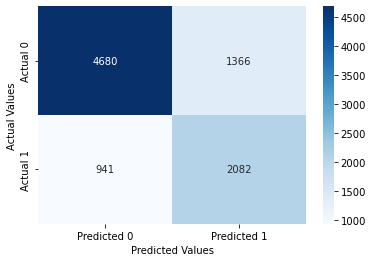

In [32]:
confusion_matrix_data(test, test.booking_status, logit_model_4, cutoff = 0.4)

## Variable Selection

In [35]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year',
            'arrival_date','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests','Complementary',
        'Corporate','Offline', 'Online','January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

In [120]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year',
       ...
       'repeated_guest_no_of_previous_cancellations',
       'repeated_guest_no_of_previous_bookings_not_canceled',
       'repeated_guest_avg_price_per_room',
       'repeated_guest_no_of_special_requests',
       'no_of_previous_cancellations_no_of_previous_bookings_not_canceled',
       'no_of_previous_cancellations_avg_price_per_room',
       'no_of_previous_cancellations_no_of_special_requests',
       'no_of_previous_bookings_not_canceled_avg_price_per_room',
       'no_of_previous_bookings_not_canceled_no_of_special_requests',
       'avg_price_per_room_no_of_special_requests'],
      dtype='object', length=134)

In [47]:
# All predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year', 
            'arrival_date','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests', 
          'MealPlan1', 'MealPlan2', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

In [55]:
# Continuous and binary categorical predictors 
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year','arrival_month',
            'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [ ]:
train.

In [64]:
train.dtypes

Booking_ID                                                 object
no_of_adults                                                int64
no_of_children                                              int64
no_of_weekend_nights                                        int64
no_of_week_nights                                           int64
                                                           ...   
no_of_week_nights_no_of_previous_cancellations              int64
no_of_week_nights_no_of_previous_bookings_not_canceled      int64
no_of_week_nights_avg_price_per_room                      float64
no_of_week_nights_no_of_special_requests                    int64
type_of_meal_plan_required_car_parking_space               object
Length: 104, dtype: object

In [50]:
X_backup = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan',
           'required_car_parking_space', 'room_type_reserved','lead_time','arrival_year','arrival_month',
            'arrival_date','market_segment_type','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [37]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('booking_status~' + '+'.join(predictor_subset), data = train).fit()
    BIC = model.bic
    return {"model":model, "BIC":BIC}

In [38]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [39]:
def forward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [40]:
# Continuous and binary categorical predictors 
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 31
Optimization terminated successfully.
         Current function value: 0.631053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
 

Processed  8 models on 7 predictors in 0.5063357353210449 seconds.
Optimization terminated successfully.
         Current function value: 0.455599
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.456269
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.455840
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.455737
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.456258
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.456087
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.456246
         Iterations 12
Processed  7 models on 8 predictors in 0.39751720428466797 seconds.
Optimization terminated successfully.
         Current function value: 0.455594
         Iterations 10
Optimization terminated successfully.
   

In [41]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)


    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')


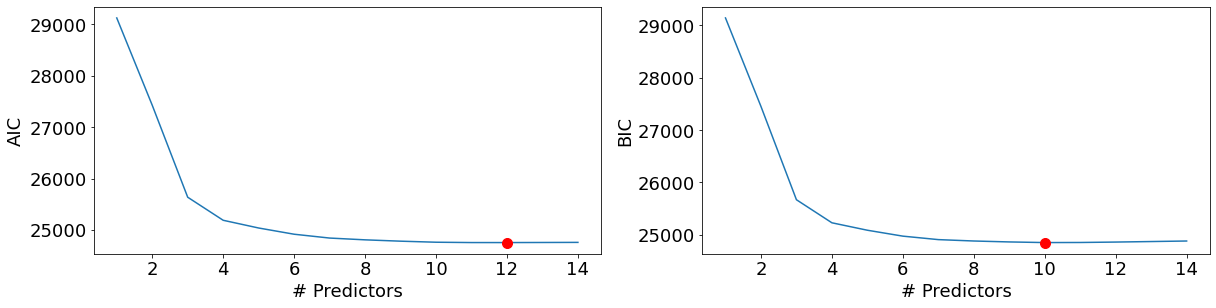

In [42]:
best_sub_plots()

In [43]:
best_forward_model = models_best.loc[11,'model']
models_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27194
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2798
Time:                        10:39:11   Log-Likelihood:                -12366.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1772.6269    106.801    -16.597      0.000   -1981.954   -1563.300
lead_time                        0.0124      0.000     57.875      0.000       0.012       0.013
no_of_special_requests          -1.1552      0.026    -44.175      0.000      -1.206      -1.104
avg_price_per_room               0.0186      0.001     34.519      0.000       0.018       0.020
arrival_year                     0.8767      0.053     16.564      0.000       0.773       0.980
required_car_parking_space      -1.4157      0.136    -10.376      0.000      -1.683      -1.148
no_of_weekend_nights             0.1672      0.018      9.197      0.000       0.132       0.203
repeated_guest                  -2.3360      0.390     -5.996      0.000      -3.100      -1.572
no_of_adults                     0.1862      0.033      5.715      0.000       0.122       0.250
arrival_month                   -0.0310      0.006     -5.258      0.000      -0.042      -0.019
no_of_week_nights                0.0535      0.011      4.749      0.000       0.031       0.076
no_of_previous_cancellations     0.2042      0.068      2.997      0.003       0.071       0.338
================================================================================================
"""

Classification accuracy = 77.9%
Precision = 65.9%
TPR or Recall = 66.8%
FNR = 33.2%
FPR = 16.7%
ROC-AUC = 83.8%


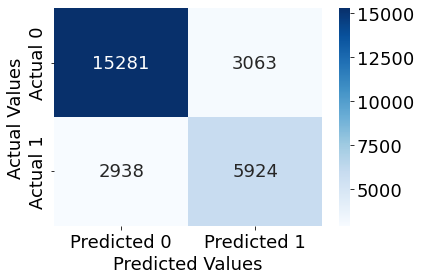

In [44]:
confusion_matrix_data(train, train.booking_status, best_forward_model, cutoff = 0.4)

Classification accuracy = 77.0%
Precision = 66.0%
TPR or Recall = 63.6%
FNR = 36.4%
FPR = 16.4%
ROC-AUC = 82.8%


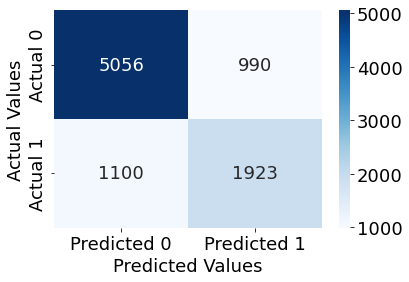

In [45]:
confusion_matrix_data(test, test.booking_status, best_forward_model, cutoff = 0.4)

In [48]:
# all predictors (except market_segment_type)
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 31
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.630324
 

Optimization terminated successfully.
         Current function value: 0.503288
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503167
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503048
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503832
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503918
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.495238
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501132
  

Optimization terminated successfully.
         Current function value: 0.456017
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.457720
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.456507
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.456151
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.457075
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.453155
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.457085
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.456866
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.457442
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.445738
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.444957
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.445302
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.445303
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.445025
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.444887
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.445268
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.444635
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.445699
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.441046
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440309
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.441108
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.440670
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.441009
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.440924
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.441106
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440757
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.440679
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.437571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437763
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437608
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437738
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437810
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437722
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.437877
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.437652
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: inf
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.435828
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435857
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435694
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.435488
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435822
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435747
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435863
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435817
         Iterations 11
Processed  14 models on 20 predictors in 1.847036600112915 seconds.
Optimization terminated successfully.
         

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.435190
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435129
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435127
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.435135
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.435185
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.435082
         Iterations 11
Processed  12 models on 22 predictors in 1.6968166828155518 seconds.
Optimization terminated successfully.
         Current function value: 0.434732
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434602
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.434776
         Iterations 12
    

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434784
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434758
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434770
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434715
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.434783
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434749
         Iterations 11
Processed  11 models on 23 predictors in 1.597031593322754 seconds.
Optimization terminated successfully.
         Current function value: 0.434546
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.434563
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.434601
         Iterations 24
Optim

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434432
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.434411
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434433
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434430
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434396
         Iterations 12
Processed  7 models on 27 predictors in 1.2197093963623047 seconds.
         Current function value: 0.434395
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.434378
         Iterations 12


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.434393
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434372
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433692
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.434391
         Iterations 12
Processed  6 models on 28 predictors in 1.2826015949249268 seconds.
Optimization terminated successfully.
         Current function value: 0.433692
         Iterations 31
Optimization terminated successfully.
         Current function value: 0.433674
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.433687
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433669
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.433644
         Iterations 12
Proce

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.433483
         Iterations: 35
Processed  1 models on 33 predictors in 0.3744850158691406 seconds.
Total elapsed time: 45.309142112731934 seconds.


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


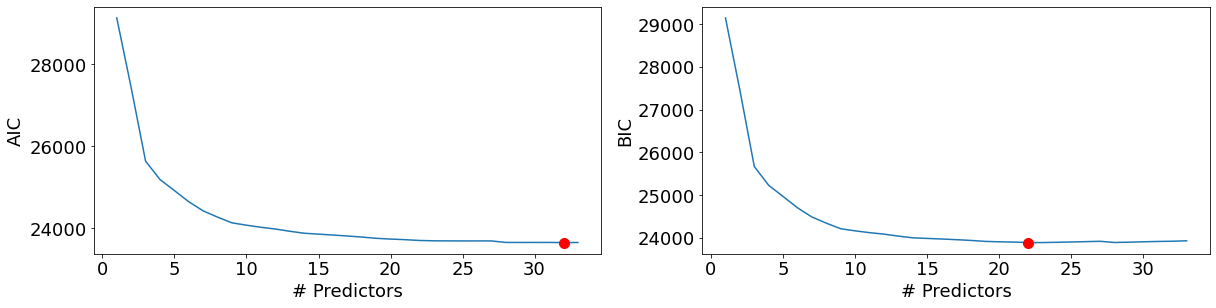

In [49]:
best_sub_plots()

In [50]:
best_forward_model = models_best.loc[22,'model']
models_best.loc[22,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27183
Method:                           MLE   Df Model:                           22
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3111
Time:                        10:44:02   Log-Likelihood:                -11829.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1338.6576    116.361    -11.504      0.000   -1566.721   -1110.594
lead_time                      0.0141      0.000     56.688      0.000       0.014       0.015
no_of_special_requests        -1.2541      0.027    -46.198      0.000      -1.307      -1.201
avg_price_per_room             0.0234      0.001     32.829      0.000       0.022       0.025
arrival_year                   0.6611      0.058     11.459      0.000       0.548       0.774
December                      -1.3732      0.083    -16.580      0.000      -1.536      -1.211
NotSelected                    1.1252      0.076     14.795      0.000       0.976       1.274
January                       -2.3451      0.247     -9.498      0.000      -2.829      -1.861
required_car_parking_space    -1.5524      0.139    -11.140      0.000      -1.825      -1.279
no_of_weekend_nights           0.1753      0.019      9.300      0.000       0.138       0.212
repeated_guest                -1.5735      0.312     -5.040      0.000      -2.185      -0.962
no_of_week_nights              0.0758      0.012      6.405      0.000       0.053       0.099
June                          -0.3374      0.057     -5.943      0.000      -0.449      -0.226
September                     -0.3711      0.055     -6.768      0.000      -0.479      -0.264
May                           -0.2979      0.062     -4.819      0.000      -0.419      -0.177
Room_Type5                    -0.9784      0.194     -5.041      0.000      -1.359      -0.598
February                       0.5882      0.081      7.291      0.000       0.430       0.746
March                          0.4092      0.066      6.169      0.000       0.279       0.539
Room_Type6                    -1.0048      0.139     -7.225      0.000      -1.277      -0.732
MealPlan1                      0.3238      0.061      5.321      0.000       0.205       0.443
November                       0.3331      0.067      5.007      0.000       0.203       0.463
no_of_children                 0.2592      0.054      4.790      0.000       0.153       0.365
no_of_adults                   0.1611      0.034      4.673      0.000       0.094       0.229
==============================================================================================
"""

Classification accuracy = 79.0%
Precision = 67.2%
TPR or Recall = 69.8%
FNR = 30.2%
FPR = 16.5%
ROC-AUC = 85.4%


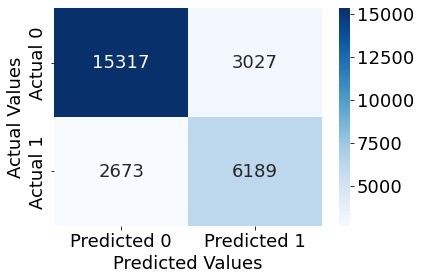

In [51]:
confusion_matrix_data(train, train.booking_status, best_forward_model, cutoff = 0.4)

Classification accuracy = 77.9%
Precision = 66.9%
TPR or Recall = 66.8%
FNR = 33.2%
FPR = 16.5%
ROC-AUC = 84.2%


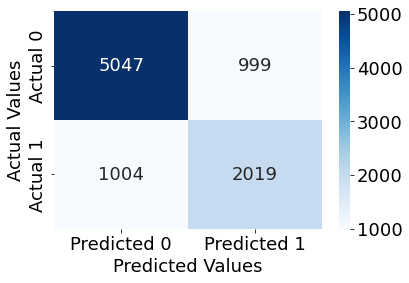

In [52]:
confusion_matrix_data(test, test.booking_status, best_forward_model, cutoff = 0.4)

In [53]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [54]:
def backward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [56]:
# continuous and binary categorical variables
models_best = backward_selection()

Optimization terminated successfully.
         Current function value: 0.454469
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.499598
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.474706
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.454511
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.454643
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.455032
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.454474
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.454970
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.459833
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.457680
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.464080
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.543038
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.458757
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.458423
         Iterations 10
Processed  7 models on 6 predictors in 0.3329477310180664 seconds.
Optimization terminated successfully.
         Current function value: 0.504288
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.486347
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.465466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.547822
         Iterations 9
Optimizat

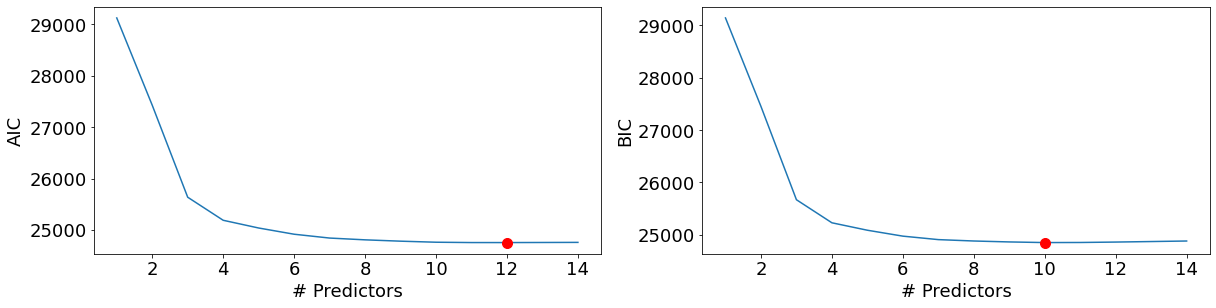

In [57]:
best_sub_plots()

In [58]:
best_backward_model = models_best.loc[11,'model']
models_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27194
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.2798
Time:                        10:45:43   Log-Likelihood:                -12366.
converged:                       True   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1772.6269    106.801    -16.597      0.000   -1981.954   -1563.300
no_of_adults                     0.1862      0.033      5.715      0.000       0.122       0.250
no_of_weekend_nights             0.1672      0.018      9.197      0.000       0.132       0.203
no_of_week_nights                0.0535      0.011      4.749      0.000       0.031       0.076
required_car_parking_space      -1.4157      0.136    -10.376      0.000      -1.683      -1.148
lead_time                        0.0124      0.000     57.875      0.000       0.012       0.013
arrival_year                     0.8767      0.053     16.564      0.000       0.773       0.980
arrival_month                   -0.0310      0.006     -5.258      0.000      -0.042      -0.019
repeated_guest                  -2.3360      0.390     -5.996      0.000      -3.100      -1.572
no_of_previous_cancellations     0.2042      0.068      2.997      0.003       0.071       0.338
avg_price_per_room               0.0186      0.001     34.519      0.000       0.018       0.020
no_of_special_requests          -1.1552      0.026    -44.175      0.000      -1.206      -1.104
================================================================================================
"""

Classification accuracy = 77.9%
Precision = 65.9%
TPR or Recall = 66.8%
FNR = 33.2%
FPR = 16.7%
ROC-AUC = 83.8%


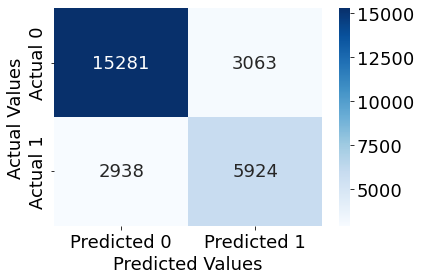

In [59]:
confusion_matrix_data(train, train.booking_status, best_backward_model, cutoff = 0.4)

Classification accuracy = 77.0%
Precision = 66.0%
TPR or Recall = 63.6%
FNR = 36.4%
FPR = 16.4%
ROC-AUC = 82.8%


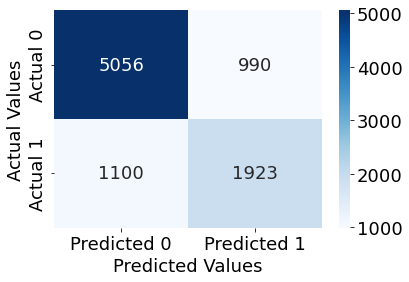

In [60]:
confusion_matrix_data(test, test.booking_status, best_backward_model, cutoff = 0.4)

In [116]:
X_backup = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights',
           'required_car_parking_space','lead_time','arrival_year','arrival_month',
            'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

In [117]:
#Including 2-factor interactions of predictors in train and 'X'. 
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] 

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
C:\Users\hodaf\AppData\Local\Temp\ipykernel_13884\1442374694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [118]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.630572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626756
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535235
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613451
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.631053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631083
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622996
 

C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LinAlgError: Singular matrix

## Ridge

In [61]:
y = train.booking_status

In [124]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6'],
      dtype='object')

In [62]:
#Standardizing predictors so that each of them have zero mean and unit variance

#Filtering all predictors
X = train.loc[:,['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'lead_time', 'arrival_year', 
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]; 

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [63]:
#The tuning parameter lambda is referred as alpha in sklearn

#Creating a range of values of the tuning parameter to visualize the ridge regression coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,200)*0.5

In [64]:
#Finding the ridge regression coefficients for increasing values of the tuning parameter
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)

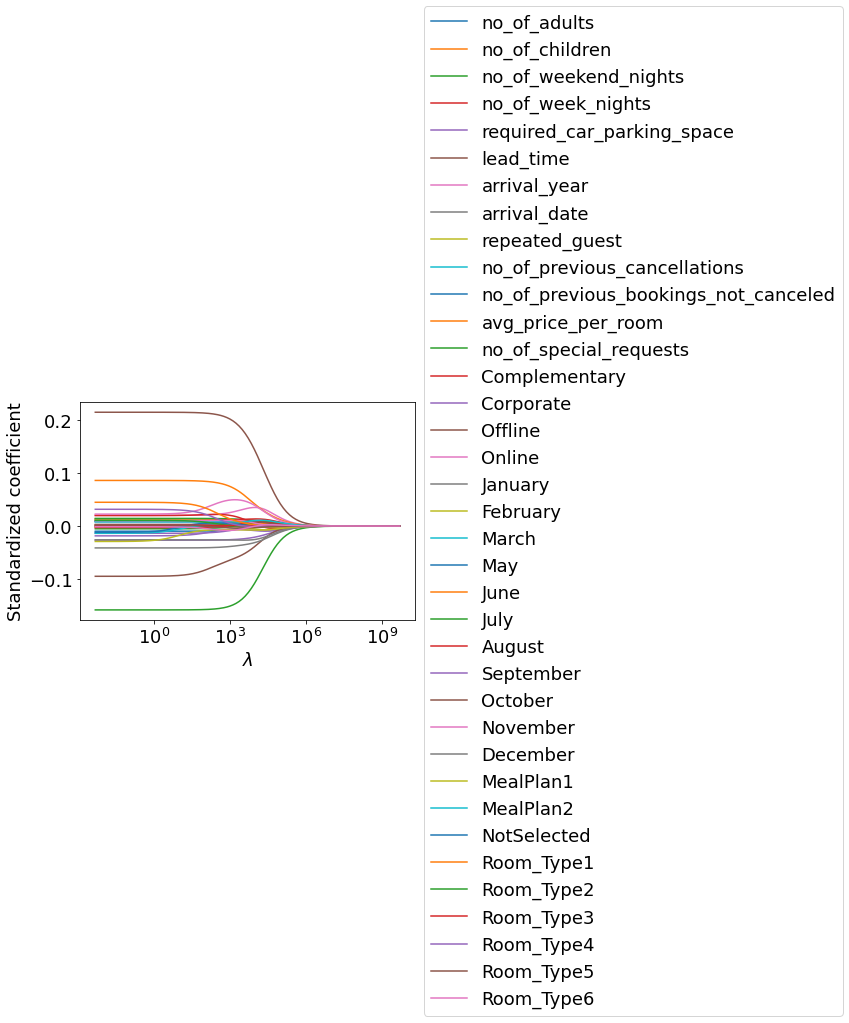

In [65]:
#Visualizing the shrinkage in ridge regression coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [66]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)

#Optimal value of the tuning parameter - lambda
ridgecv.alpha_

15.811388300841896

Text(0, 0.5, 'Cross-validation error')

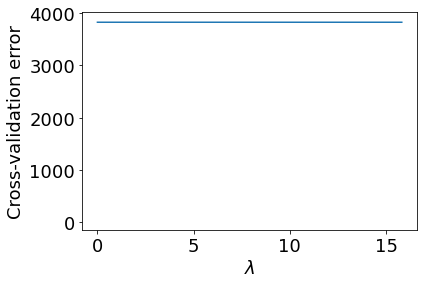

In [132]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(ridgecv.alphas,ridgecv.cv_values_.sum(axis=0))
plt.plot([ridgecv.alpha_,ridgecv.alpha_],[40,40.2],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [67]:
#Test dataset
Xtest = test.loc[:,['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'lead_time', 'arrival_year', 
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 
       'Complementary', 'Corporate', 'Offline', 'Online', 'January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

#Standardizing test data
Xtest_std = scaler.transform(Xtest)

In [68]:
#Using the developed ridge regression model to predict on test data
ridge = Ridge(alpha = ridgecv.alpha_)
ridge = ridge.fit(Xstd, y)


Classification accuracy = 76.7%
Precision = 65.1%
TPR or Recall = 74.4%
FNR = 25.6%
FPR = 22.0%
ROC-AUC = 87.2%


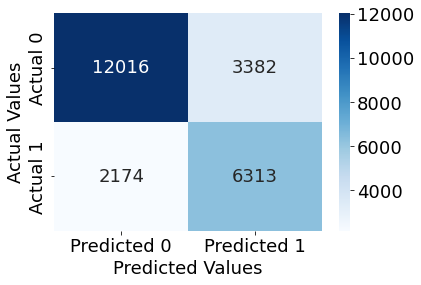

In [69]:
confusion_matrix_data(Xstd, y, ridge, cutoff = 0.4)

Classification accuracy = 76.1%
Precision = 65.2%
TPR or Recall = 72.6%
FNR = 27.4%
FPR = 22.0%
ROC-AUC = 86.2%


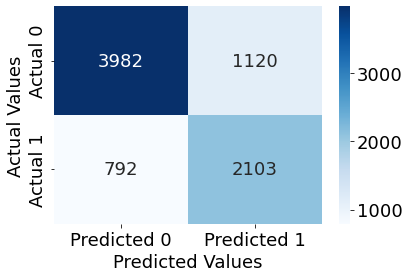

In [70]:
confusion_matrix_data(Xtest_std, test.booking_status, ridge, cutoff = 0.4)

## Lasso

In [71]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [72]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

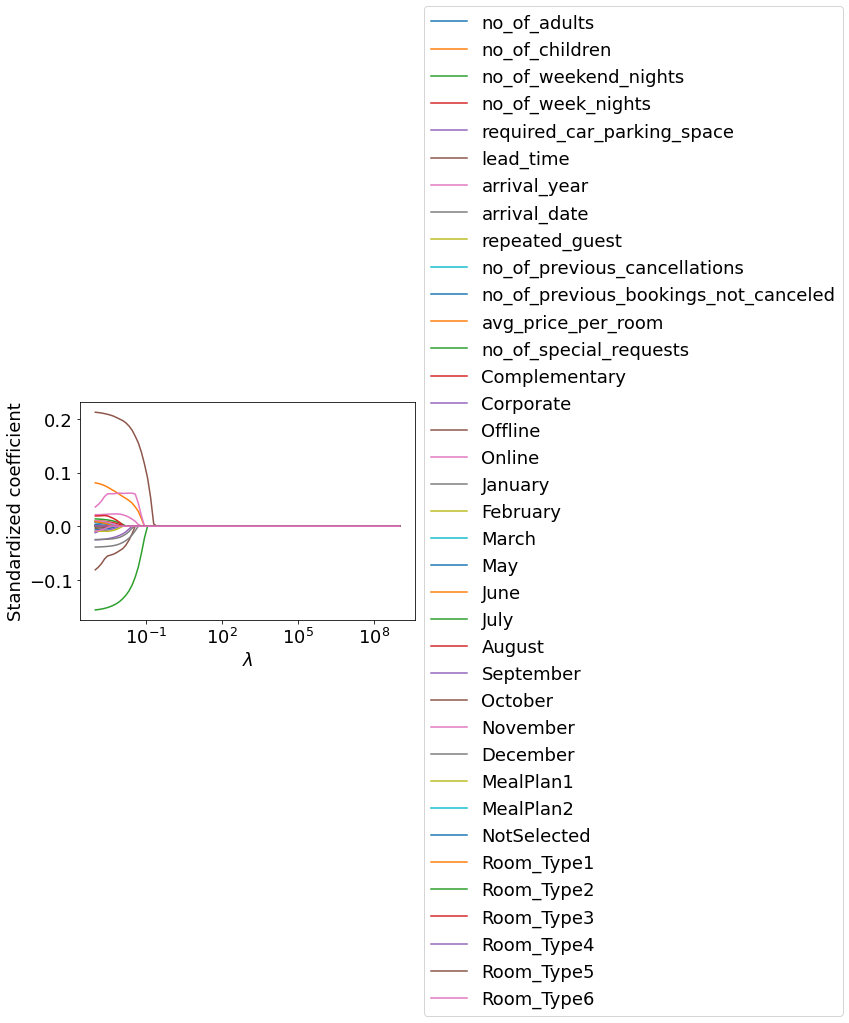

In [73]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [74]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.00014665831391950227

Text(0, 0.5, 'Cross-validation error')

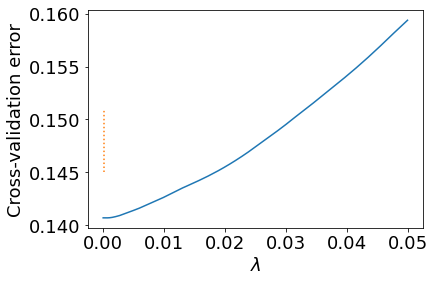

In [144]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

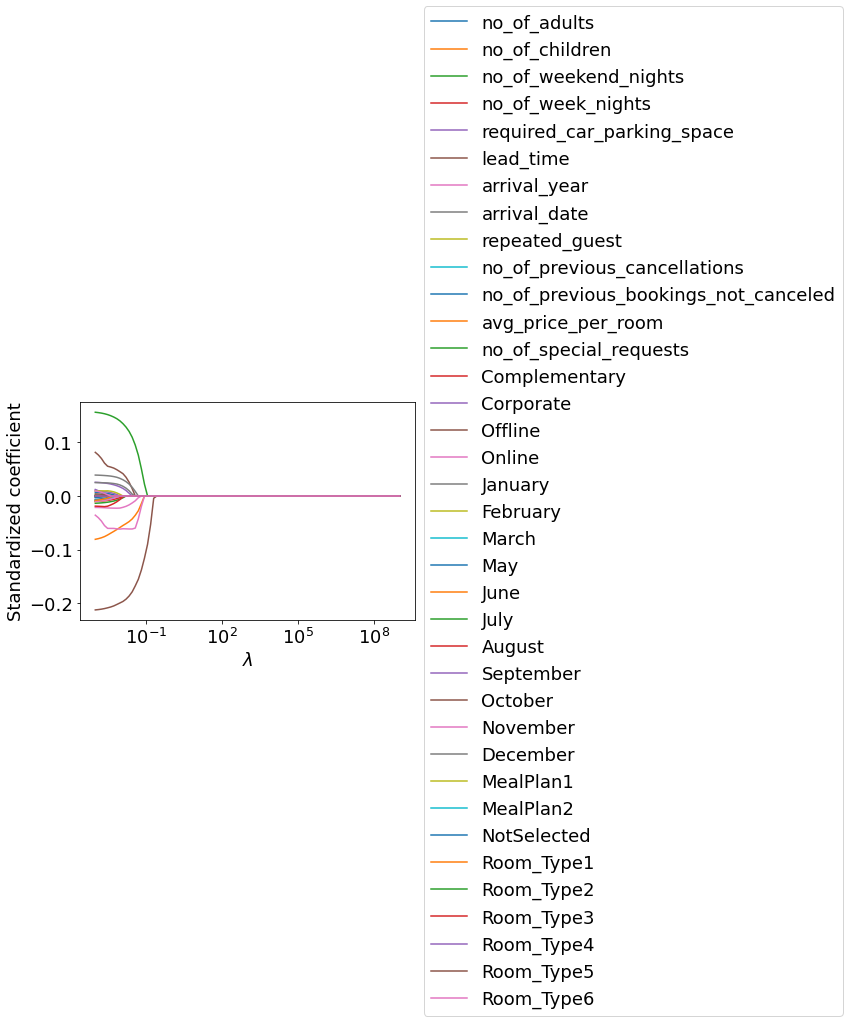

In [145]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(train.columns.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved']), loc='center left', bbox_to_anchor=(1, 0.5));

In [75]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso = lasso.fit(Xstd, y)

Classification accuracy = 76.7%
Precision = 65.1%
TPR or Recall = 74.2%
FNR = 25.8%
FPR = 21.9%
ROC-AUC = 87.2%


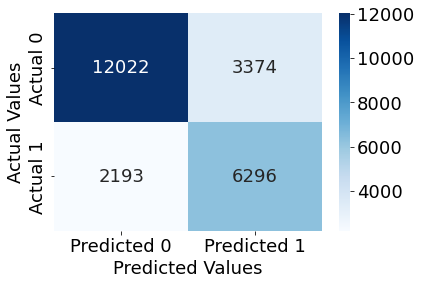

In [76]:
confusion_matrix_data(Xstd, y, lasso, cutoff = 0.4)

Classification accuracy = 76.1%
Precision = 65.2%
TPR or Recall = 72.4%
FNR = 27.6%
FPR = 21.9%
ROC-AUC = 86.2%


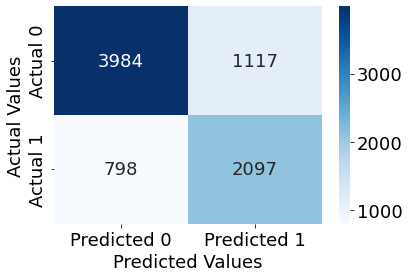

In [77]:
confusion_matrix_data(Xtest_std, test.booking_status, lasso, cutoff = 0.4)

## KNN

In [78]:
# Split train and test datasets
y = df_dummy.booking_status
X = df_dummy.drop(['booking_status', 'Booking_ID', 'type_of_meal_plan', 'market_segment_type', 
                               'arrival_month', 'room_type_reserved'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

In [79]:
# KNN with all predictors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

Classification accuracy = 86.8%
Precision = 84.5%
TPR or Recall = 72.8%
FNR = 27.2%
FPR = 6.5%
ROC-AUC = 83.2%


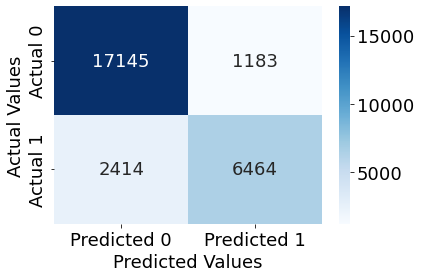

In [80]:
confusion_matrix_data(X_train, y_train, knn, cutoff = 0.4)

Classification accuracy = 79.6%
Precision = 73.6%
TPR or Recall = 59.9%
FNR = 40.1%
FPR = 10.7%
ROC-AUC = 74.6%


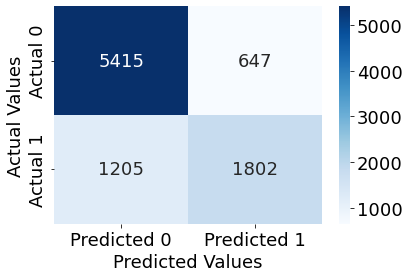

In [81]:
confusion_matrix_data(X_test, y_test, knn, cutoff = 0.4)

In [82]:
# KNN with features selected from forward and backward selection 
y = df_dummy.booking_status
X = df_dummy[['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
            'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 
            'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
knn = KNeighborsClassifier().fit(X_train, y_train)

Classification accuracy = 87.2%
Precision = 84.7%
TPR or Recall = 74.2%
FNR = 25.8%
FPR = 6.5%
ROC-AUC = 83.8%


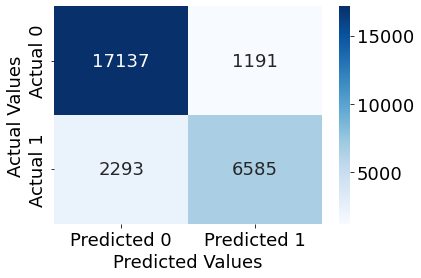

In [83]:
confusion_matrix_data(X_train, y_train, knn, cutoff = 0.4)

Classification accuracy = 80.9%
Precision = 75.3%
TPR or Recall = 63.1%
FNR = 36.9%
FPR = 10.3%
ROC-AUC = 76.4%


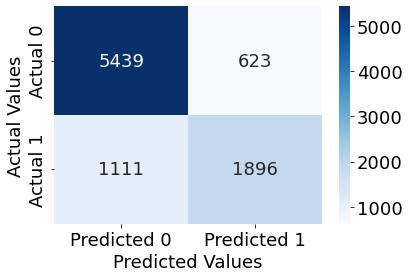

In [84]:
confusion_matrix_data(X_test, y_test, knn, cutoff = 0.4)